# Mount Google Drive
*   https://www.kaggle.com/code/manishthem/entity-recognition-for-ocr-using-text-data-xml/notebook
*   http://alexminnaar.com/2019/08/22/ner-rnns-tensorflow.html
*   https://github.com/yrnigam/Named-Entity-Recognition-NER-using-LSTMs/blob/master/Named_Entity_Recognition_(NER)_using_LSTMs.ipynb
*   https://sandipanweb.wordpress.com/2020/08/30/named-entity-recognition-ner-on-twitter-with-bi-directional-lstm-with-tensorflow-in-python/
* https://www.kaggle.com/code/itsmerasheed/named-entity-recognition-ner-with-tensorflow/notebook
* https://www.kaggle.com/code/akanksha496/sentiment-analysis/data
* https://www.embedded-robotics.com/sentiment-analysis-using-lstm/
*https://www.dataknowsall.com/ner.html












In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data File OCR dan TIF yang Ada Di Dalam Direktori Google Drive kemudian masukkan dalam list

In [3]:
import os
DIREKTORI = '/content/drive/MyDrive/DTS Kominfo/OCR/ImageAndXML_Data'
data_files = os.listdir(DIREKTORI)
# print(data_files)

Ambil file OCR dan file TIF. Masukkan dalam list

In [4]:
import fnmatch
file_ocr = []
file_tif = []
i = 0
for file in data_files:
    if fnmatch.fnmatch(file,'*_ocr.xml'):
        i +=1
        file_ocr.append(file)    
        tif = file.replace("_ocr.xml",".tif")
        file_tif.append(tif)

print("jumlah file OCR",i)

jumlah file OCR 520


Coba lihat pola yang ada dari file OCR 

In [5]:
# lihat data
idx = 0
file_ocr1 = open(DIREKTORI+"/"+file_ocr[idx])
print(file_ocr1.name)
print(file_tif[idx])
# print(file_ocr1.read())


/content/drive/MyDrive/DTS Kominfo/OCR/ImageAndXML_Data/2029200005_ocr.xml
2029200005.tif


Coba lihat gambar dari salah satu file Invoice

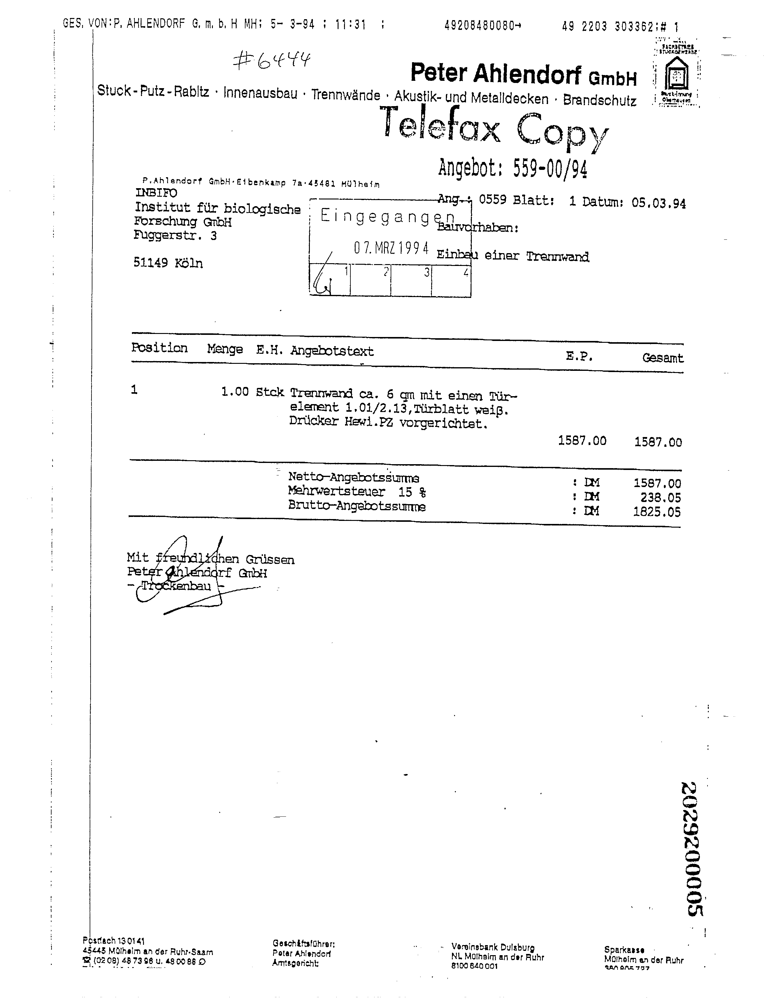

In [6]:
# lihat gambar tif
from PIL import Image 
im = Image.open(DIREKTORI+"/"+file_tif[idx])
im

# Lakukan Iterasi di Dalam file XML. Kemudian ambil text yang penting

In [7]:
from lxml import etree, objectify

parser = etree.XMLParser(remove_blank_text=True)
tree = etree.parse(os.path.join(DIREKTORI,file_ocr[0]))
root = tree.getroot()

for elem in root.getiterator():
    if not hasattr(elem.tag, 'find'): continue  
    i = elem.tag.find('}')
    if i >= 0:
        elem.tag = elem.tag[i+1:]
objectify.deannotate(root, cleanup_namespaces=True)

In [8]:
tag_list = []
for element in root.iter():
    tag_list = element.tag
print(tag_list)

Coords


In [9]:
import re
prev_block_Page = ''
prev_block_Block = ''
prev_block_Line = ''
prev_block_Word = ''
sentence = ''
sentence2 = ''
sentence3 = ''
block = []
line = []
for element in root.iter('Unicode'):
    same_page = same_block = same_line = next_word = False
    parent_node = next(element.iterancestors('Word'))
    block_list = parent_node.attrib['id'].split('_')
    if(prev_block_Page == block_list[0] or prev_block_Page == ''):
        same_page = True
    if(prev_block_Block == block_list[1] or prev_block_Block == ''):
        same_block = True        
    if(prev_block_Line == block_list[2] or prev_block_Line == ''):
        same_line = True
    if(prev_block_Word == int(block_list[3][1:])-1 or prev_block_Word == ''):
        next_word = True
                    
    #only same line present in one sentnece:
    #Here we check if the sentence contains the keywords which we are looking for like 'Date'
    if same_line and same_block:
        sentence3 = sentence3 + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' ' 
    else:
        line.append(sentence3)
        sentence3 = ''
        sentence3 = sentence3 + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text)+ ' '
    
    #same block in one line:
    if same_block:
        sentence = sentence + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' '
    else:
        block.append(sentence)
        sentence = ''
        sentence = sentence + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text)+ ' '  
      
    #all text in same line:
    sentence2 = sentence2 + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' '
        
    prev_block_Page = block_list[0]
    prev_block_Block = block_list[1]
    prev_block_Line = block_list[2]
    prev_block_Word = int(block_list[3][1:])
print(line)
print(block)    
print(sentence2)

['GES  VON   P  AHLENDORF G  a  b  H MH  5  3 94 : 11   31 : ', '49206480080  ', '49 2203 3033621 ', ' iiarat  ', 'Peter Ahlendorf GmbH i ', 'it ', 'Stuck Putz Rabitz   Innenausbau   Trennwflnde   Akustik  und Metalldecken   Brandschutz     ', 'R Ahlandorf  S 6H 1b r k p 7 4J481 ', 'IK3IF0 ', 'Telefax Copy ', 'Angebot: 559 00 94 ', 'a   Sa W,9tei   Eingegang ', 'Fuggerstr  3 ', '51149 Koln ', '07 MRZ1994 ', 'p ', '  ', 'i ', '3 ', 'L ', '0559 3latt: 1 Datum: 05 03 94 ', 'elnar Tronnvand ', 'Position Mange E H  Angefcctstext ', 'S P  ', 'Gesarct ', '1 1 00 Btck Trennwand ca  6 gn mit einen Ttir  ', 'elanent 1 01 2 13,Tiirblatt weip  ', 'Drtickar Kewl pz vergerIchtat  ', '1587 00 ', '1507 00 ', 'Netto AngeictssuTro ', '  EM ', '1587 00 ', 'Mehrvertfltauer 15   ', ': Hi ', '238 05 ', 'Brutto Angetotssiirme ', 'i EM ', '1825 05 ', 'P  chWOU1 ', ' J4A5 MCSh lm tn Ur Ruhr 3 m ', '0 M a Jteu aocMO ', 'Pate ANtndcrf ', 'V Tiinibinlc Di iburg ', 'NL  n Ur Ruhr ', 'rOOMOOOl ', 'Spirtim ', 'tr  U

In [10]:
filename = 'beautiful_data.txt'
write_txt_to_file = open(filename,'a')
write_txt_to_file.write(sentence2)
write_txt_to_file.close()

In [11]:
import csv
field = ['TEXT']
row = sentence
filename = 'beautiful_data.csv'
with open(filename,'a',newline='') as csvfile:
    csvwriter = csv.writer(csvfile)#creates an object for writing in csv files
    csvwriter.writerow(sentence)

In [12]:
txt_filename = 'beautiful_data_summary.txt'
for xml_file in file_ocr:
    parser = None
    root = None
    tree = None
    new_sentence = ''
    parser = etree.XMLParser(remove_blank_text=True)
    xml_file_path = os.path.join(DIREKTORI,xml_file)
    tree = etree.parse(xml_file_path)
    root = tree.getroot()
    #remove the namespaces
    for elem in root.getiterator():
        if not hasattr(elem.tag, 'find'): continue  
        i = elem.tag.find('}')
        if i >= 0:
            elem.tag = elem.tag[i+1:]
    objectify.deannotate(root, cleanup_namespaces=True)
    
    for element in root.iter('Unicode'):
        new_sentence = new_sentence + re.sub("[^0-9a-zA-Z:,]+", ' ',element.text) + ' '
    #print('new_sentence = '+new_sentence)    
    #writing the new_sentence in the file 
    wrtie_txt_to_file = None
    write_txt_to_file = open(txt_filename,'a')
    write_txt_to_file.write(new_sentence)
    write_txt_to_file.write('\n')
    write_txt_to_file.close()

In [13]:
import pandas as pd
pd.set_option('display.max_colwidth',3000)
df = pd.read_csv('./beautiful_data_summary.txt',delimiter='/n',header=None)
# df.head(7)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


## AMBIL 

In [14]:
import spacy
import spacy.cli
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [15]:
print("jumlah data",df.shape[0])

jumlah data 519


In [16]:
def tentukan_index(xval,xlist):
  return xlist.index(xval)

import re
from string import punctuation
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

In [ ]:
import csv
data_list_lengkap = []
data_header = ['ocr','text','label']
data_list_lengkap.append(data_header)
label_list = []
index_label = ''
for i in range(0, df.shape[0]):
  text = df.iloc[i,:]
  doc = nlp(str(text))
  for ent in doc.ents:
      if ent.label_ not in label_list:
        label_list.append(ent.label_)
      index_label = tentukan_index(ent.label_,label_list)
      data_list = [i,preprocess_text(ent.text),index_label]
      data_list_lengkap.append(data_list)
print(data_list_lengkap)

In [18]:
df_text = pd.DataFrame()

data_header = ['ocr','text','label']
label_list = []
index_label = ''
for i in range(0, df.shape[0]):
  text = df.iloc[i,:]
  doc = nlp(str(text))
  for ent in doc.ents:
      if ent.label_ not in label_list:
        label_list.append(ent.label_)
      index_label = tentukan_index(ent.label_,label_list)
      data_list = [[i,preprocess_text(ent.text),index_label]]
      df_temp = pd.DataFrame(data_list, columns=data_header)

      df_text = pd.concat([df_text, df_temp], ignore_index=True)

In [19]:
df_text.tail()

,ocr,text,label
13204,518,two,1
13205,518,1v034s,1
13206,518,2003000,1
13207,518,2001213573,2
13208,518,518,1


In [20]:
df_text.groupby('label').count()

,ocr,text
label,,
0,2667,2667
1,5551,5551
2,2061,2061
3,960,960
4,1046,1046
5,165,165
6,75,75
7,164,164
8,50,50


In [21]:
label_list

['ORG',
 'CARDINAL',
 'DATE',
 'PERSON',
 'GPE',
 'QUANTITY',
 'NORP',
 'FAC',
 'ORDINAL',
 'LAW',
 'TIME',
 'PRODUCT',
 'MONEY',
 'LOC',
 'EVENT',
 'WORK_OF_ART',
 'LANGUAGE']

In [ ]:
FILE_CSV = 'beautiful_data_train.csv'
with open(FILE_CSV, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data_list_lengkap)

In [ ]:
import pandas as pd
df=pd.read_csv('./beautiful_data_train.csv')
df.tail()

,ocr,text,label
26410,1037,1,0
26411,1037,147,0
26412,1037,gray robertson cr,6
26413,1037,202937027j,3
26414,1037,1037,3


In [ ]:
df = df.sample(frac=1, axis=1).reset_index(drop=True)

In [ ]:
df.groupby('label').count()

,text,ocr
label,,
0,11076,11076
1,300,300
2,5334,5334
3,4148,4148
4,120,120
5,2092,2092
6,1920,1920
7,328,328
8,130,130


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


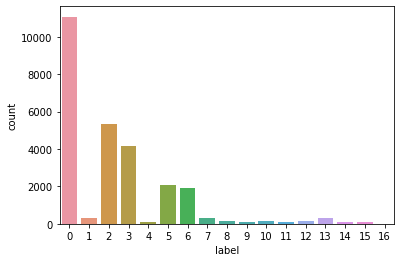

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
df['text'] = df['text'].astype(str).to_numpy()
df['label'] = df['label'].to_numpy()

In [24]:
df_text['text'] = df_text['text'].astype(str).to_numpy()
df_text['label'] = df_text['label'].to_numpy()

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(df['text'],df['label'],test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(21132,) (21132,)
(5283,) (5283,)


In [25]:
x_train,x_test,y_train,y_test= train_test_split(df_text['text'],df_text['label'],test_size=0.2, random_state=42)
x_train,x_val,y_train,y_val= train_test_split(x_train, y_train, test_size=0.25, random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_val.shape, y_val.shape)

(7925,) (7925,)
(2642,) (2642,)
(2642,) (2642,)


In [26]:
vocab_size=100000
oov_tok='<OOV>'
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [27]:
tokenizer.fit_on_texts(x_train)
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)

Number of Documents:  7925
Number of Words:  100000


In [28]:
sequence_length = 200

In [29]:
train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [30]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [31]:
val_sequences = tokenizer.texts_to_sequences(x_val)
val_padded = pad_sequences(val_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [32]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

model = Sequential()
embedding_dim = 16
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))
lstm_out = 32
model.add(Bidirectional(LSTM(lstm_out)))
model.add(Dense(17, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           1600000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 17)                1105      
                                                                 
Total params: 1,613,649
Trainable params: 1,613,649
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
history = model.fit(train_padded, y_train, epochs=10, validation_data=(val_padded, y_val))

Epoch 1/10
248/248 [==============================] - 39s 143ms/step - loss: 1.8035 - accuracy: 0.4130 - val_loss: 1.6008 - val_accuracy: 0.5053
Epoch 2/10
248/248 [==============================] - 33s 135ms/step - loss: 1.3326 - accuracy: 0.5620 - val_loss: 1.1693 - val_accuracy: 0.6120
Epoch 3/10
248/248 [==============================] - 33s 133ms/step - loss: 0.9273 - accuracy: 0.7233 - val_loss: 0.9939 - val_accuracy: 0.7180
Epoch 4/10
248/248 [==============================] - 33s 135ms/step - loss: 0.6460 - accuracy: 0.8346 - val_loss: 0.9068 - val_accuracy: 0.7358
Epoch 5/10
248/248 [==============================] - 33s 133ms/step - loss: 0.4745 - accuracy: 0.8838 - val_loss: 0.9095 - val_accuracy: 0.6949
Epoch 6/10
248/248 [==============================] - 33s 133ms/step - loss: 0.3706 - accuracy: 0.9022 - val_loss: 0.9248 - val_accuracy: 0.7014
Epoch 7/10
248/248 [==============================] - 33s 133ms/step - loss: 0.3060 - accuracy: 0.9151 - val_loss: 0.9294 - val_ac

In [34]:
model.evaluate(test_padded, y_test)

83/83 [==============================] - 2s 23ms/step - loss: 1.0242 - accuracy: 0.7509


[1.0241942405700684, 0.7509462237358093]

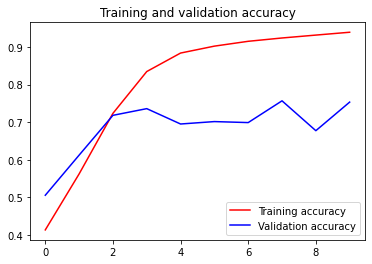

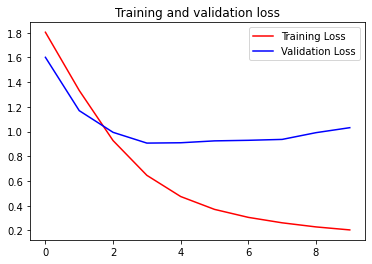

In [35]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()